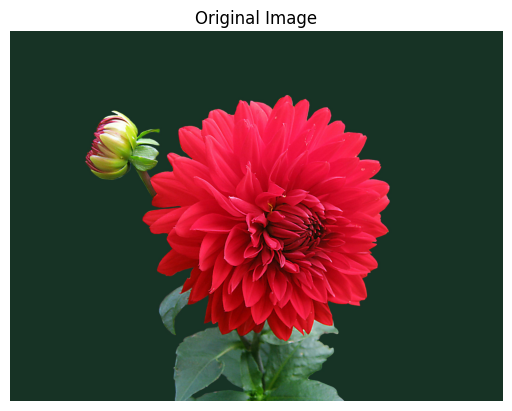

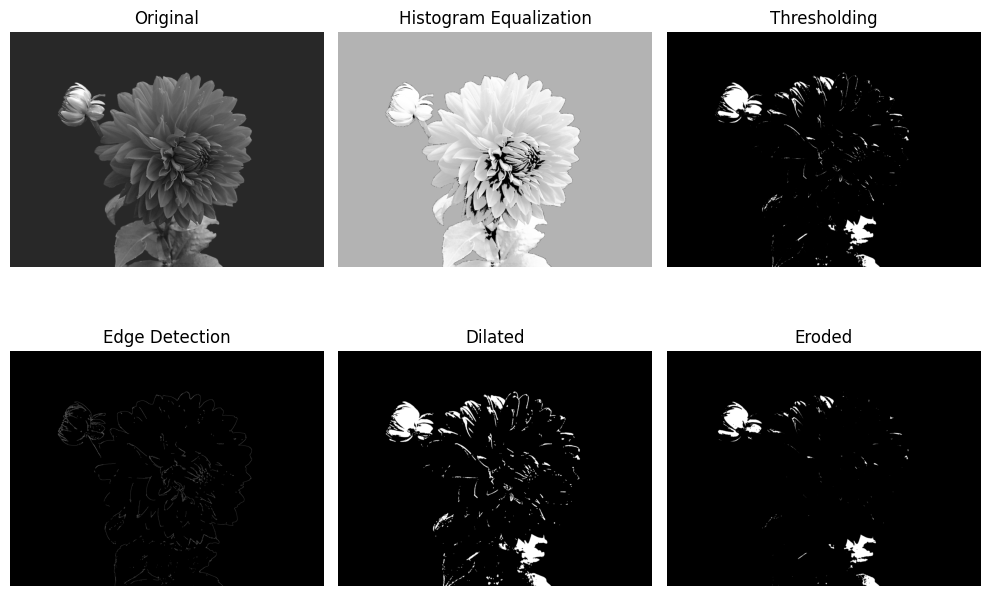

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img1.jpg')
plt.axis("off")
plt.title("Original Image")  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Load the image
image = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

# Histogram Equalization
hist_eq = cv2.equalizeHist(image)

# Thresholding
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Edge Detection
edges = cv2.Canny(image, 100, 200)


# Morphological Operations: Dilation and Erosion
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)
eroded = cv2.erode(thresh, kernel, iterations=1)

# Plotting the results
images = [image, hist_eq, thresh, edges, dilated, eroded]
titles = ['Original', 'Histogram Equalization', 'Thresholding', 'Edge Detection', 'Dilated', 'Eroded']

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


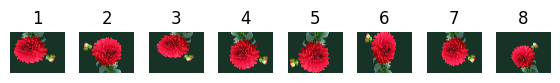

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Path to your input image
input_image_path = 'img1.jpg'

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotation angle range (degrees)
    width_shift_range=0.1,  # Fractional shift in the width direction
    height_shift_range=0.1, # Fractional shift in the height direction
    shear_range=0.2,        # Shear intensity (angle in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Load an example image to use for augmentation
img = load_img(input_image_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Number of augmented images to generate
num_images = 4
augmented_images = []

# Generate augmented images using the datagen.flow() method
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    augmented_images.append(array_to_img(batch[0]))
    if i >= num_images - 1:
        break
for i in range(num_images):
    plt.subplot(1, num_images + 1, i + 2)
    plt.imshow(augmented_images[i])
    plt.title(f'{i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# # Data Augmentation: Rotate, Flip, Shift
# def augment_image(image):
#     rows, cols = image.shape

#     # Rotation
#     M_rot = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
#     rotated = cv2.warpAffine(image, M_rot, (cols, rows))

#     # Flip
#     flipped = cv2.flip(image, 1)

#     # Shift
#     M_shift = np.float32([[1, 0, 50], [0, 1, 50]])
#     shifted = cv2.warpAffine(image, M_shift, (cols, rows))

#     return rotated, flipped, shifted

# rotated, flipped, shifted = augment_image(image)

